In [30]:
%load_ext autoreload
%autoreload 2
import os
import dask
import panel
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import nisardev as nisar
import grimpfunc as grimp
import numpy as np
from sklearn.manifold import TSNE
import xarray as xr
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
ProgressBar().register()
dask.config.set(num_workers=2)  # Avoid problems with too many open connections at NSIDC
panel.extension() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = xr.open_dataset('../data/clean/Filtered_ZachariaeIsstromVelocitySeries.nc')

/var/folders/z2/t78xbk451n74r4q5p4w1zt640000gn/T/ipykernel_45785/3198044104.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  data_flat = data.to_array().values.reshape(data.dims['time'], -1)


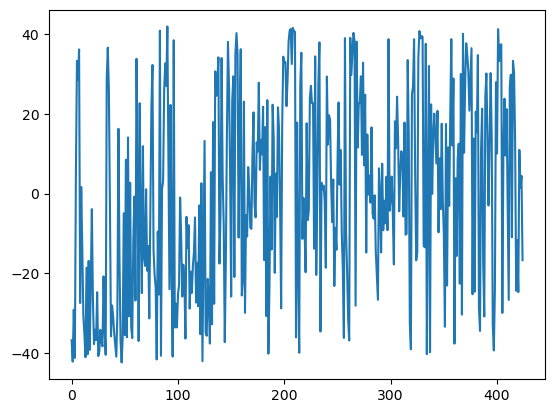

In [32]:
data_flat = data.to_array().values.reshape(data.dims['time'], -1)

# Perform t-SNE
valid_n_components = min(data_flat.shape[0], data_flat.shape[1])
tsne = TSNE(n_components=valid_n_components, random_state=42)
tsne_results = tsne.fit_transform(data_flat)

# Convert the t-SNE results back to an xarray DataArray
tsne_da = xr.DataArray(tsne_results, dims=['time', 'tsne_component'], name='tsne_results')

plt.plot(tsne_da.time, tsne_da[:, 0])